1: Classification with Diabetes Data Set

In [4]:
# Load helpers
import pandas as pd
import numpy as np
import seaborn as sn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


import sklearn.metrics
import sklearn.neighbors

In [5]:
# Read data
dia_df = pd.read_csv("diabetes.csv")
columns = dia_df.columns
columns = columns.drop("Outcome")
dia_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Replace missing value with column mean (value=0)
dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0, dia_df.mean())
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [12]:
dia_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Use corrMatrix explore correlations between features within this dataset

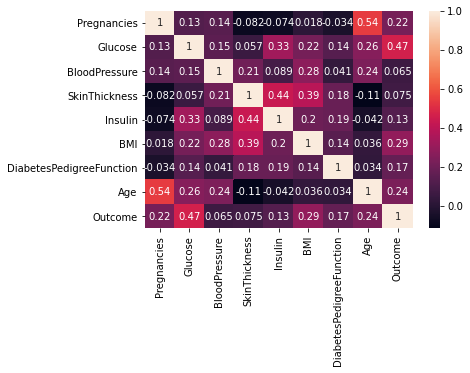

In [6]:
corrMatrix = dia_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see that BMI and SkinThickness have strong correlation, as well as Outcome and Glucose.

Explore data distribution of every features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002DD825E0>,
      dtype=object)

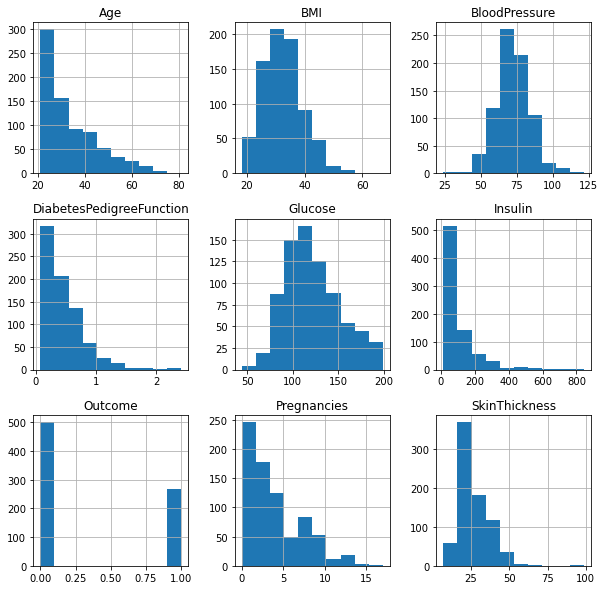

In [35]:
dia_df.hist(figsize = (10,10))

Because we got the result that Outcome and Glucose have strong correlation from corrMatrix, so I decide to use scatter plot to explore their relationship, it looks like people with high glucose more possible to diagnose with diabetes

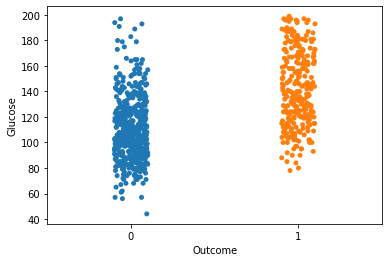

In [39]:
sn.stripplot(x = dia_df['Outcome'],y = dia_df['Glucose'])

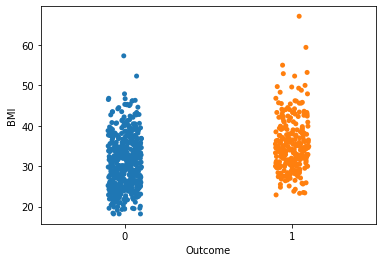

In [43]:
sn.stripplot(x = dia_df['Outcome'],y = dia_df['BMI'])

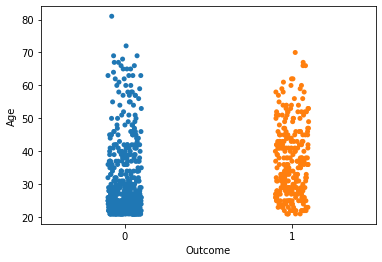

In [44]:
sn.stripplot(x = dia_df['Outcome'],y = dia_df['Age'])

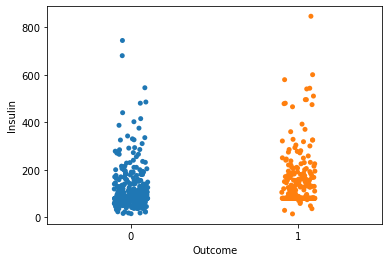

In [45]:
sn.stripplot(x = dia_df['Outcome'],y = dia_df['Insulin'])

Text(0, 0.5, 'SkinThickness')

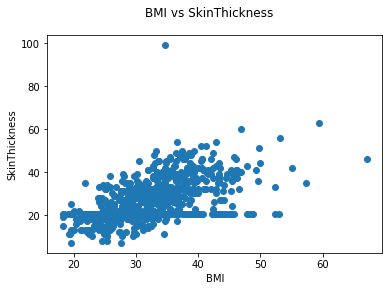

In [46]:
plt.scatter(dia_df['BMI'], dia_df['SkinThickness'])
plt.suptitle('BMI vs SkinThickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

After finished the exploration of this dataset, I decide to Classification models to predict the whether a patient has diabetes based on these features, also I need to rank these models according to their performance

In [123]:
# Seperate data with features and labels
X = dia_df.drop('Outcome', 1) #features
y = dia_df['Outcome']  #labels

# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42) #split by half

# Normalizing features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
KNN Classifier

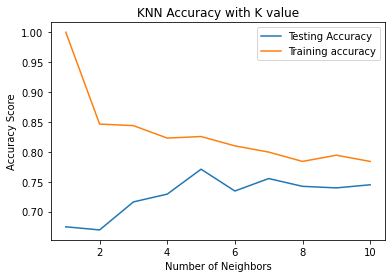

Best Score:0.7474577709871827
Best Parameters: {'n_neighbors': 8}


In [96]:
# Grid research to find best K-value
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,11)#range for k_value
#space for accuracy score
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Show by graph
plt.figure()
plt.title('KNN Accuracy with K value')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.xticks()
plt.yticks()
plt.legend()
plt.show()

# Show by grid research
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))



[1]
0.7838541666666666
0.7421875
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       254
           1       0.67      0.47      0.55       130

    accuracy                           0.74       384
   macro avg       0.72      0.68      0.69       384
weighted avg       0.73      0.74      0.73       384



Text(0.5, 15.0, 'Predicted label')

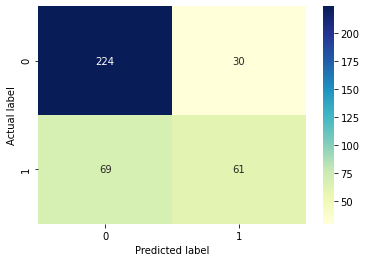

In [100]:
# Apply best k-value with prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) #best k-value of 8
knn.fit(X_train, y_train)
prediction = knn.predict([[5, 100, 80,20,250,25,0.55,35]])
# Pridict Outcome with 5 of pregnant time,100 of Glucose, 80 of BloodPressure, 20 of SkinThickness, 250 of Insulin,25 of BMI,0.55 of DiabetesPedigreeFunction, age of 35 

print(prediction)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)


# Performance of KNN Classifier based on test scores
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

# Performance of KNN Classifier  based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of KNN Classifier based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Logistic Regression

[1]
0.7578125
0.7916666666666666
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       254
           1       0.71      0.65      0.68       130

    accuracy                           0.79       384
   macro avg       0.77      0.76      0.76       384
weighted avg       0.79      0.79      0.79       384



Text(0.5, 15.0, 'Predicted label')

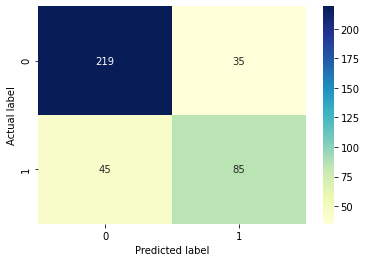

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="none",solver="lbfgs")
lr.fit(X_train,y_train)
prediction = lr.predict([[5, 100, 80,20,250,25,0.55,35]])
# Pridict Outcome with 5 of pregnant time,100 of Glucose, 80 of BloodPressure, 20 of SkinThickness, 250 of Insulin,25 of BMI,0.55 of DiabetesPedigreeFunction, age of 35 

print(prediction)

y_test_pred =lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# Performance of Logistic Regression based on test scores
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

# Performance of Logistic Regression based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Logistic Regression based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')





In [ ]:
 Decision Tree Classifier


In [109]:
# Grid research to find best max_depth value

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1,50)}
dtc = DecisionTreeClassifier()
dtc_cv= GridSearchCV(dtr,param_grid,cv=5)
dtc_cv.fit(X,y)

print("Best Score:" + str(dtr_cv.best_score_))
print("Best Parameters: " + str(dtr_cv.best_params_))


Best Score:0.25209571194393227
Best Parameters: {'max_depth': 3}


[1]
0.7578125
0.7447916666666666
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       254
           1       0.77      0.35      0.48       130

    accuracy                           0.74       384
   macro avg       0.75      0.65      0.66       384
weighted avg       0.75      0.74      0.71       384



Text(0.5, 15.0, 'Predicted label')

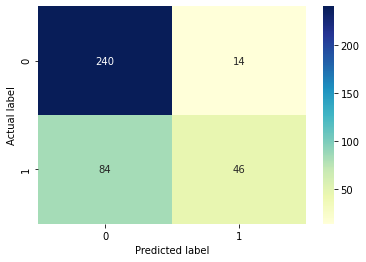

In [110]:
# Apply best best max_depth value with prediction

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
prediction = dtc.predict([[5, 100, 80,20,250,25,0.55,35]])
# Pridict Outcome with 5 of pregnant time,100 of Glucose, 80 of BloodPressure, 20 of SkinThickness, 250 of Insulin,25 of BMI,0.55 of DiabetesPedigreeFunction, age of 35 

print(prediction)

y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)


# Performance of Decision Tree Classifier based on test scores
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

# Performance of Decision Tree Classifier based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Decision Tree Classifier based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
Random Forst

In [115]:
# Grid research to find best max_depth value and best n_estimators
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': list(range(1, 50)),
    'max_depth' : [5,10,15,20,25]}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
CV_rfc.best_params_


{'max_depth': 20, 'n_estimators': 12}

[1]
0.9869791666666666
0.78125
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       254
           1       0.69      0.64      0.66       130

    accuracy                           0.78       384
   macro avg       0.76      0.75      0.75       384
weighted avg       0.78      0.78      0.78       384



Text(0.5, 15.0, 'Predicted label')

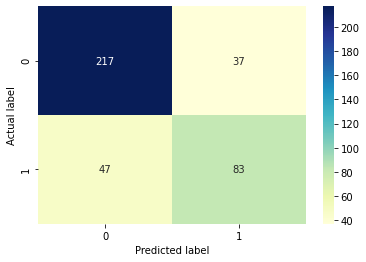

In [145]:
# Apply best best max_depth value with prediction

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=12,max_depth=20)
rfc.fit(X_train,y_train)
prediction = rfc.predict([[5, 100, 80,20,250,25,0.55,35]])
# Pridict Outcome with 5 of pregnant time,100 of Glucose, 80 of BloodPressure, 20 of SkinThickness, 250 of Insulin,25 of BMI,0.55 of DiabetesPedigreeFunction, age of 35 

print(prediction)

y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)


# Performance of Random Forst based on test scores
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

# Performance of Random Forst based on classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

# Performance of Random Forst based on confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

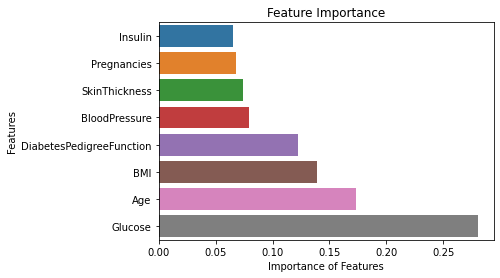

In [144]:
# Variable Importance with Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=12,max_depth=20)
rfc.fit(X_train,y_train)

feature_imp = pd.Series(rfc.feature_importances_,
                        index=X.columns).sort_values()

sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

After I run KNN, Logistic, decision tree, random forest,I found that the random forest is the best classifier with best score on test(unseen) dataset, its score on test data is 0.9869791666666666

2.Regression with Retail Data Analytics

In [5]:
# Read Data

store = pd.read_csv("stores_data_set.csv")
feature = pd.read_csv("Features_data_set.csv")
sales = pd.read_csv("sales_data_set.csv")



In [161]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [162]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [163]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
# Transform categorical label to number
sales.IsHoliday = sales.IsHoliday.replace({False:0, True:1})
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,0
1,1,1,12/02/2010,46039.49,1
2,1,1,19/02/2010,41595.55,0
3,1,1,26/02/2010,19403.54,0
4,1,1,05/03/2010,21827.90,0
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,0
421566,45,98,05/10/2012,628.10,0
421567,45,98,12/10/2012,1061.02,0
421568,45,98,19/10/2012,760.01,0


In [58]:
# Merge sales dataset and store dataset
df = pd.merge(sales,store)
df=df.drop(columns=['Type', 'Date'])
df

,Store,Dept,Weekly_Sales,IsHoliday,Size
0,1,1,24924.50,0,151315
1,1,1,46039.49,1,151315
2,1,1,41595.55,0,151315
3,1,1,19403.54,0,151315
4,1,1,21827.90,0,151315
...,...,...,...,...,...
421565,45,98,508.37,0,118221
421566,45,98,628.10,0,118221
421567,45,98,1061.02,0,118221
421568,45,98,760.01,0,118221


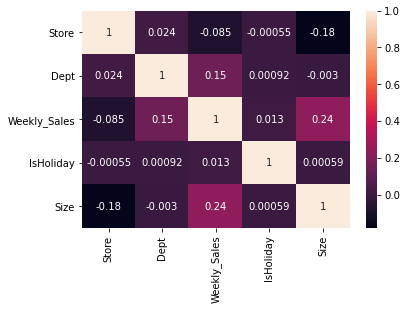

In [25]:
# Explore Correalation between variables
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

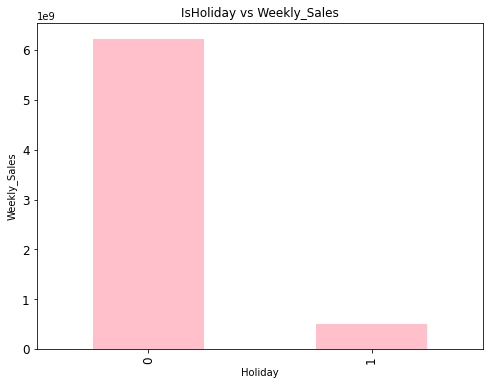

In [36]:
# holiday vs Weekly_Sales
ax = df[['IsHoliday','Weekly_Sales']].groupby(['IsHoliday']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="IsHoliday vs Weekly_Sales", 
                                       color='pink', fontsize=12)
ax.set_xlabel("Holiday")
ax.set_ylabel("Weekly_Sales")
plt.show()

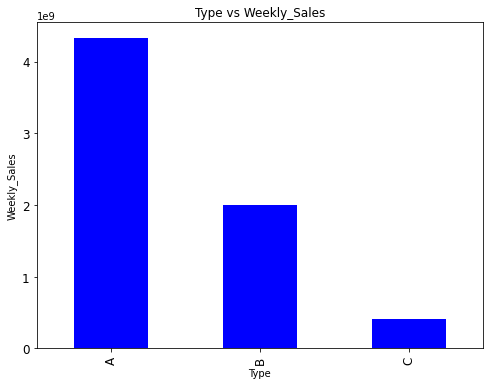

In [39]:
# Type vs Weekly_Sales
ax = df[['Type','Weekly_Sales']].groupby(['Type']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Type vs Weekly_Sales", 
                                       color='blue', fontsize=12)
ax.set_xlabel("Type")
ax.set_ylabel("Weekly_Sales")
plt.show()

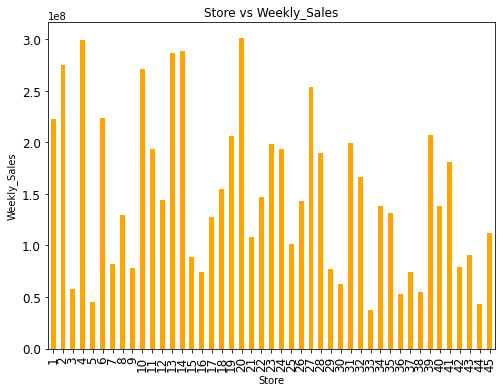

In [43]:
# Store vs Weekly_Sales
ax = df[['Store','Weekly_Sales']].groupby(['Store']).sum().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Store vs Weekly_Sales", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Store")
ax.set_ylabel("Weekly_Sales")
plt.show()

In [59]:
#Set X and y
X = df.drop('Weekly_Sales', axis=1)
y =df['Weekly_Sales']


In [63]:
# Split the dataframe into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42) #split by half



In [65]:
# Linear Regression
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge, LassoCV, BayesianRidge
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train)) #estimate both train and test set accuracy 
print(lr.score(X_test,y_test))


0.08366859079541822
0.08380488261073515


In [70]:
#Lasso Regression
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(X_train, y_train)
print(lasso.score(X_train,y_train)) #estimate both train and test set accuracy 
print(lasso.score(X_test,y_test))

0.08240802963466765
0.08272882336031717


In [71]:
#Ridge Regression
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(X_train, y_train)
print(ridge.score(X_train,y_train)) #estimate both train and test set accuracy 
print(ridge.score(X_test,y_test))

0.06376509074470493
0.06401756826320448


3. Triage with World Happiness Report in 2019

In [74]:
# Read Data
happy = pd.read_csv("2019.csv")

In [75]:
happy.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


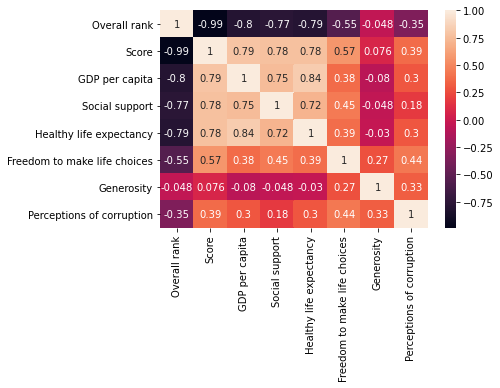

In [76]:
# Explore Correalation between variables
corrMatrix = happy.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Explore the relationship/correlation between Happy score and GDP

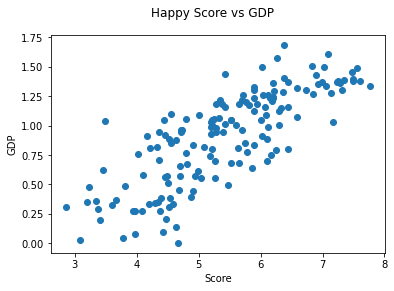

In [80]:
GDP = plt.scatter(happy['Score'], happy['GDP per capita'])
plt.suptitle('Happy Score vs GDP')
plt.xlabel('Score')
plt.ylabel('GDP')
print(GDP)

Explore the relationship/correlation between Happy score and Generosity

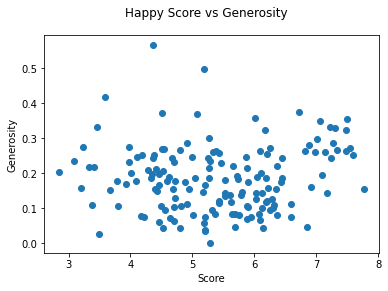

In [84]:
Generosity = plt.scatter(happy['Score'], happy['Generosity'])
plt.suptitle('Happy Score vs Generosity')
plt.xlabel('Score')
plt.ylabel('Generosity')
print(Generosity)

Explore what are Top 20 happiest countries

Text(0.5, 1.0, 'Top 20 happiest countries')

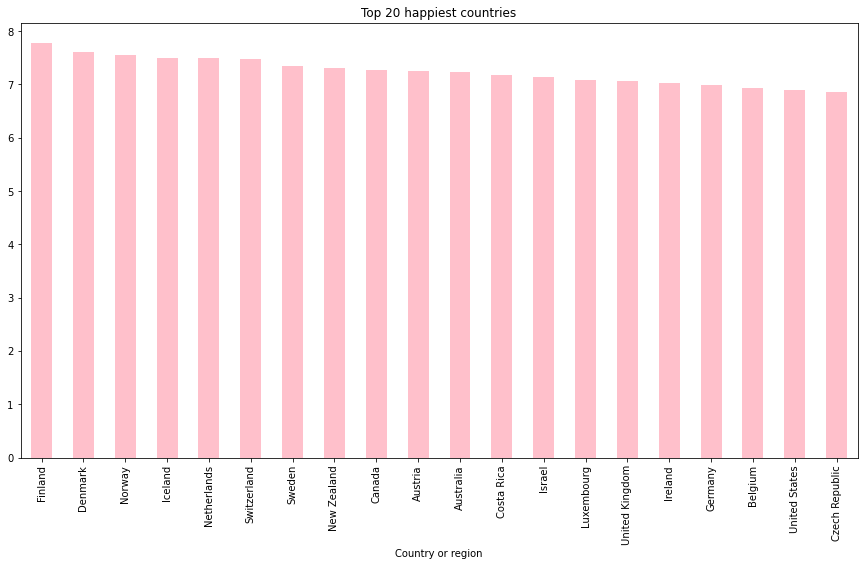

In [83]:
happy.groupby('Country or region')['Score'].max().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(15,8),color='pink')
plt.title('Top 20 happiest countries')

Explore what are bottom 20 happiest countries

Text(0.5, 1.0, 'Bottom 20 happiest countries')

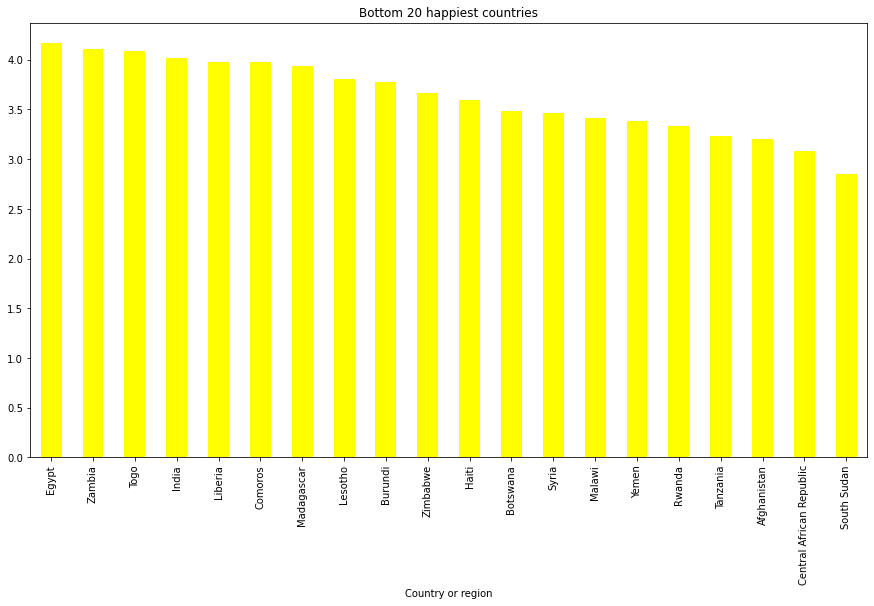

In [86]:
happy.groupby('Country or region')['Score'].max().sort_values(ascending=False).tail(20).plot(kind='bar', figsize=(15,8),color='yellow')
plt.title('Bottom 20 happiest countries')